<a href="https://colab.research.google.com/github/yoojiwonn/python_data/blob/main/tf_keras_DNN_SinCos_JWYoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SinCos 데이터 생성**

image.png

In [ ]:
import tensorflow as tf
import numpy as np
import math

def func(x):
    y = 0.5 * (math.cos(8*x) + math.sin(4*x) - x + 0.8)
    return y

X_train = []
y_train = []

# 0.1에서 0.9까지 17개 훈련 데이터 생성
for i in range(17):
    x = 0.1 + i*0.1
    x = round(x, 2)
    y = func(x)
    y = round(y, 4)
    X_train.append(x)
    y_train.append(y)

print("X_train", X_train)
print("y_train", y_train)

# 0.1에서 0.9까지 81개 테스트 데이터 생성 (확인용)
X_test = []
y_test = []
for i in range(81):
    x = 0.1 + i*0.01
    x = round(x, 2)
    y = func(x)
    X_test.append(x)
    y_test.append(y)
    
print("X_test", X_test)
print("y_test", y_test)

X_train [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]
y_train [0.8931, 0.6441, 0.3473, 0.2006, 0.2778, 0.4815, 0.6053, 0.4674, 0.0329, -0.5512, -1.0313, -1.1904, -0.9722, -0.5141, -0.0678, 0.1447, 0.0529]
X_test [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]
y_test [0.8930625258279079, 0.87654530463229, 0.8576495808069697, 0.8365501975382577, 0.8134343220987978, 0.7885001139358545, 0.7619553254971738, 0.7340158449549439, 0.7049041903548093, 0.6748479650220652, 0.644078284299117, 0.6128281838654941, 0.5813310200030446, 0.549

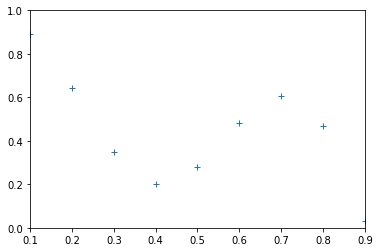

In [ ]:
import matplotlib.pyplot as plt

# 훈련 데이터 분포
plt.plot(X_train, y_train, '+')
plt.xlim([0.1, 0.9])
plt.ylim([0, 1.])
plt.show()

In [ ]:
import os
import random

# 실험결과 동일화를 위하여, 모든 random seed를 고정 
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
set_seeds(0)

In [ ]:
from tensorflow.keras import Sequential  # 모듈(변수나 함수를 포함)만 불러오기
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# -0.5에서 +0.5 사이로 초기화
initializer = RandomUniform(minval=-0.25, maxval=0.25)

# 모델 구조 정의하기
model = Sequential()                  # 순차적 계층 준비
model.add(Dense(6, input_dim=1,       # 은닉노드 6개, 입력값 1차원
                activation='sigmoid', # 전통적 MLP의 Sigmoid 활성함수 
                kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
model.add(Dense(1, activation='linear')), # regression 문제는 선형활성함수 사용

# # 모델 구조 정의하기
# model = Sequential()                  # 순차적 계층 준비
# model.add(Dense(6, input_dim=1,       # 은닉노드 6개, 입력값 1차원
#                 activation='sigmoid', # 전통적 MLP의 Sigmoid 활성함수 
#                 kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
# model.add(Dense(3, 
#                 activation='sigmoid', # 전통적 MLP의 Sigmoid 활성함수 
#                 kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
# model.add(Dense(1, activation='linear')), # regression 문제는 선형활성함수 사용


# 모델 구축하기
opt = Adam(learning_rate=0.01) # learning_rate=0.001 (default 값)
rmse = tf.keras.metrics.RootMeanSquaredError(name='rmse')
model.compile(loss='mse',         # regression 문제는 손실함수로 MSE 사용
              optimizer=opt,   # 최적화 기법으로 adam 사용
              metrics=[rmse, 'mae','mape'])

In [ ]:
# 데이터 훈련하기
hist = model.fit(X_train, y_train, epochs=100, verbose=1)

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_rmse: ', score[1])
print('test_mae: ', score[2])
print('test_mape: ', score[3])

Epoch 1/100
1/1 [==============================] - 1s 527ms/step - loss: 0.7158 - rmse: 0.8461 - mae: 0.6363 - mape: 307.8010
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6587 - rmse: 0.8116 - mae: 0.6031 - mape: 281.0200
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6071 - rmse: 0.7792 - mae: 0.5720 - mape: 254.8955
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5610 - rmse: 0.7490 - mae: 0.5505 - mape: 231.1167
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5204 - rmse: 0.7214 - mae: 0.5298 - mape: 207.8460
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.4851 - rmse: 0.6965 - mae: 0.5118 - mape: 185.6991
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4549 - rmse: 0.6744 - mae: 0.4972 - mape: 164.9791
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4295 - rmse: 0.6554 - mae: 0.4872 - mape: 146.3832

3/3 [==============================] - 0s 9ms/step
[0.22091287, 0.21777993, 0.21464774, 0.21151644, 0.20838588, 0.20525616, 0.20212743, 0.19899964, 0.19587284, 0.19274712, 0.18962243, 0.18649888, 0.18337661, 0.18025544, 0.17713556, 0.17401704, 0.17089996, 0.16778418, 0.16466987, 0.16155711, 0.1584458, 0.1553362, 0.15222809, 0.14912188, 0.1460172, 0.14291438, 0.13981333, 0.1367141, 0.1336168, 0.13052148, 0.12742817, 0.124336846, 0.1212476, 0.11816049, 0.11507548, 0.111992754, 0.10891228, 0.10583403, 0.10275818, 0.09968463, 0.09661365, 0.09354494, 0.090478905, 0.087415315, 0.08435429, 0.081296034, 0.07824031, 0.07518745, 0.072137214, 0.06908981, 0.06604529, 0.06300368, 0.059964918, 0.056929164, 0.05389636, 0.050866656, 0.04784002, 0.04481656, 0.041796185, 0.038779028, 0.03576515, 0.032754533, 0.02974727, 0.026743338, 0.023742855, 0.020745844, 0.017752193, 0.014762126, 0.011775576, 0.008792698, 0.0058134347, 0.0028377622, -0.00013412535, -0.0031022802, -0.0060666203, -0.00902722, -0.01198

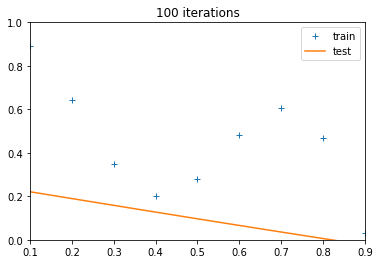

In [ ]:
import matplotlib.pyplot as plt

def draw_graph(k):
    plt.plot(X_train, y_train, '+')
    plt.plot(X_test, y_pred, '-')
    plt.legend(['train','test'], loc='upper right')

    plt.title(str(k)+" iterations")
    plt.xlim([0.1, 0.9])
    plt.ylim([0, 1.])
    plt.show()
   
y_pred = model.predict(X_test)
print(list(y_pred[:,0]))
draw_graph(100)

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'rmse', 'mae', 'mape'])


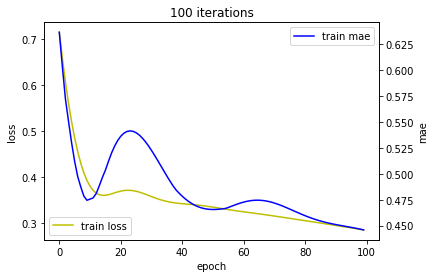

In [ ]:
def loss_graph(k):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    acc_ax.plot(hist.history['mae'], 'b', label='train mae')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mae')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')

    plt.title(str(k)+" iterations")
    plt.show()

loss_graph(100)

Epoch 1/1500
2/2 [==============================] - 1s 20ms/step - loss: 0.3060 - rmse: 0.5532 - mae: 0.4466 - mape: 138.1476
Epoch 2/1500
2/2 [==============================] - 0s 12ms/step - loss: 0.2643 - rmse: 0.5141 - mae: 0.4150 - mape: 121.8516
Epoch 3/1500
2/2 [==============================] - 0s 7ms/step - loss: 0.2784 - rmse: 0.5277 - mae: 0.4762 - mape: 198.5714
Epoch 4/1500
2/2 [==============================] - 0s 12ms/step - loss: 0.2666 - rmse: 0.5163 - mae: 0.4578 - mape: 184.7480
Epoch 5/1500
2/2 [==============================] - 0s 5ms/step - loss: 0.2493 - rmse: 0.4993 - mae: 0.4064 - mape: 138.8977
Epoch 6/1500
2/2 [==============================] - 0s 10ms/step - loss: 0.2416 - rmse: 0.4916 - mae: 0.3848 - mape: 126.9225
Epoch 7/1500
2/2 [==============================] - 0s 12ms/step - loss: 0.2296 - rmse: 0.4792 - mae: 0.3838 - mape: 142.4961
Epoch 8/1500
2/2 [==============================] - 0s 8ms/step - loss: 0.2238 - rmse: 0.4731 - mae: 0.3922 - mape: 177.

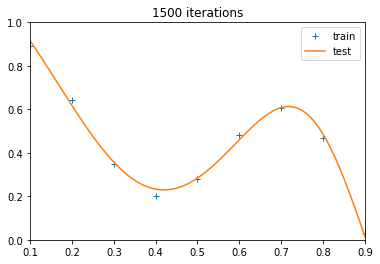

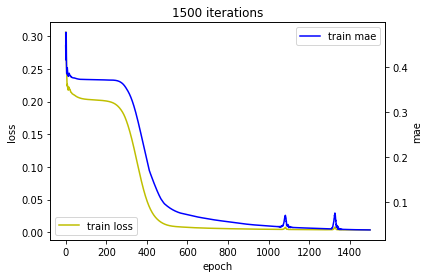

In [ ]:
from sklearn.utils import shuffle

# X_train, y_train = shuffle(X_train, y_train)

def train_k_times(k = 100):    
    global X_test, y_pred, hist
    
    # 훈련 데이터로 학습하기
    opt = Adam(0.05) # learning_rate=0.2 (default 값)
    rmse = tf.keras.metrics.RootMeanSquaredError(name='rmse')
    # model = tf.keras.models.load_model('dnn_sincos.h5')
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[rmse, 'mae','mape'])
    hist = model.fit(X_train, y_train, epochs=k, batch_size=10, verbose=1)

    # 테스트 데이터로 평가하기
    score = model.evaluate(X_test, y_test)
    print('test_loss: ', round(score[0], 6))
    print('test_rmse: ', round(score[1], 6))
    print('test_mae: ', round(score[2], 6))
    print('test_mape: ', round(score[3], 6))
    model.save('dnn_sincos.h5')

    # 테스트 데이터의 예측값 생성하기
    y_pred = model.predict(X_test)
    print(list(y_pred[:,0]))

k = 1500
train_k_times(k)
draw_graph(k)
loss_graph(k)

In [ ]:
model.get_weights()

[array([[ -4.4433656,   3.3509982,  -6.9032125,  -4.069471 , -10.97024  ,
          14.656727 ]], dtype=float32),
 array([  4.4010143,  -1.6532347,   1.5184162,  -1.6295683,   9.63536  ,
        -15.837237 ], dtype=float32),
 array([[-7.4005795],
        [ 1.3448565],
        [ 2.6386015],
        [ 0.775519 ],
        [ 4.3987994],
        [-2.3814225]], dtype=float32),
 array([1.5696695], dtype=float32)]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
